# Marketing Intelligence Exam 

Questions to answer:
1. What are the most effective channels, devices, ages or gender in terms of the different metrics?  
2. conversion rate (goals/sessions)
3. bounce rate (bounces/sessions) 
4. pageviews per session (pageviews/sessions)
5. any hidden relationship that could be insightful for us. 

Their goal is to build machine learning models so they can use this information to improve how they are managing the leads that go to the call center. How would you do it?

# Import dataset

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('~/Documents/Modules/Term 2/Marketing Intelligence/Exam/IE - MBD - Marketing Intelligence - Home Exam Dataset.csv')

First overlook

In [4]:
df = df.sort_values('Date')

df.head(10)

,Date,Channel,Device Category,Age,Gender,Users,Sessions,Pageviews,Bounces,Time on Page,Leads
22544,20170101,Organic Search,desktop,18-24,male,82,117,1874,19,46099,4
31396,20170101,(Other),mobile,45-54,male,45,49,50,46,775,2
36966,20170101,(Other),desktop,55-64,female,32,36,124,27,1130,0
52307,20170101,Referral,desktop,25-34,female,13,19,346,4,8385,0
52306,20170101,Organic Search,tablet,45-54,male,13,16,79,3,3099,1
52305,20170101,Organic Search,mobile,18-24,male,13,15,49,5,2339,0
43244,20170101,Display,desktop,18-24,female,22,29,238,16,2368,1
43245,20170101,Display,desktop,25-34,male,22,28,213,15,8321,0
24984,20170101,Paid Search,mobile,25-34,male,69,74,120,54,4107,2
24983,20170101,Organic Search,desktop,45-54,male,69,108,2202,20,56193,0


In [58]:
# add some metrics 

# conversion rate
df['Conversion Rate'] = df[' Leads'] / df['Sessions']

# bounce rate
df['Bounce Rate'] = df['Bounces'] / df['Sessions']

# pageview per session
df['Pageview/session'] = df['Pageviews'] / df['Sessions']

df.head(10)

,Date,Channel,Device Category,Age,Gender,Users,Sessions,Pageviews,Bounces,Time on Page,Leads,unique,Conversion Rate,Bounce Rate,Pageview/session
22544,20170101,Organic Search,desktop,18-24,male,82,117,1874,19,46099,4,Organic Searchdesktop18-24male,0.034188,0.162393,16.017094
31396,20170101,(Other),mobile,45-54,male,45,49,50,46,775,2,(Other)mobile45-54male,0.040816,0.938776,1.020408
36966,20170101,(Other),desktop,55-64,female,32,36,124,27,1130,0,(Other)desktop55-64female,0.000000,0.750000,3.444444
52307,20170101,Referral,desktop,25-34,female,13,19,346,4,8385,0,Referraldesktop25-34female,0.000000,0.210526,18.210526
52306,20170101,Organic Search,tablet,45-54,male,13,16,79,3,3099,1,Organic Searchtablet45-54male,0.062500,0.187500,4.937500
52305,20170101,Organic Search,mobile,18-24,male,13,15,49,5,2339,0,Organic Searchmobile18-24male,0.000000,0.333333,3.266667
43244,20170101,Display,desktop,18-24,female,22,29,238,16,2368,1,Displaydesktop18-24female,0.034483,0.551724,8.206897
43245,20170101,Display,desktop,25-34,male,22,28,213,15,8321,0,Displaydesktop25-34male,0.000000,0.535714,7.607143
24984,20170101,Paid Search,mobile,25-34,male,69,74,120,54,4107,2,Paid Searchmobile25-34male,0.027027,0.729730,1.621622
24983,20170101,Organic Search,desktop,45-54,male,69,108,2202,20,56193,0,Organic Searchdesktop45-54male,0.000000,0.185185,20.388889


# What types of combinations appear more often?

In [12]:
# first group the different metrics 
df['unique'] = df['Channel'] + df['Device Category'] + df['Age'] + df['Gender'] 

# display most common combinations
df['unique'].value_counts()

Paid Searchmobile45-54male          396
Organic Searchmobile25-34male       396
Directdesktop25-34male              396
Organic Searchmobile35-44female     396
Paid Searchmobile45-54female        396
Organic Searchmobile45-54male       396
(Other)desktop45-54female           396
(Other)desktop25-34male             396
Directmobile35-44male               396
Directdesktop25-34female            396
Paid Searchdesktop18-24female       396
Organic Searchmobile18-24male       396
Directdesktop45-54female            396
Paid Searchmobile35-44male          396
Referraldesktop25-34female          396
Directdesktop18-24male              396
Paid Searchdesktop45-54female       396
(Other)mobile45-54male              396
Organic Searchmobile18-24female     396
Paid Searchdesktop18-24male         396
Paid Searchdesktop45-54male         396
Directdesktop45-54male              396
(Other)desktop18-24female           396
(Other)mobile35-44male              396
Paid Searchdesktop25-34male         396


As we can see, some combinations appear every day, and those are out most frequent visitors. These customers should be considered the target customers

## Let's look at the most common age, gender, channel and device

In [16]:
# Most common channel
df['Channel'].value_counts()

Organic Search    11993
(Other)           11926
Direct            11529
Paid Search       10976
Display            5805
Referral           3970
Social             2014
Email                82
Name: Channel, dtype: int64

In [19]:
# Most common device
df['Device Category'].value_counts()

desktop    26710
mobile     20333
tablet     11252
Name: Device Category, dtype: int64

In [21]:
# Most common age
df['Age'].value_counts()

25-34    12353
35-44    12293
45-54    10808
55-64     8966
18-24     8579
65+       5296
Name: Age, dtype: int64

In [23]:
# Most common gender
df['Gender'].value_counts()

female    30880
male      27415
Name: Gender, dtype: int64

# Plotting historic developments

Historic development in Device Category

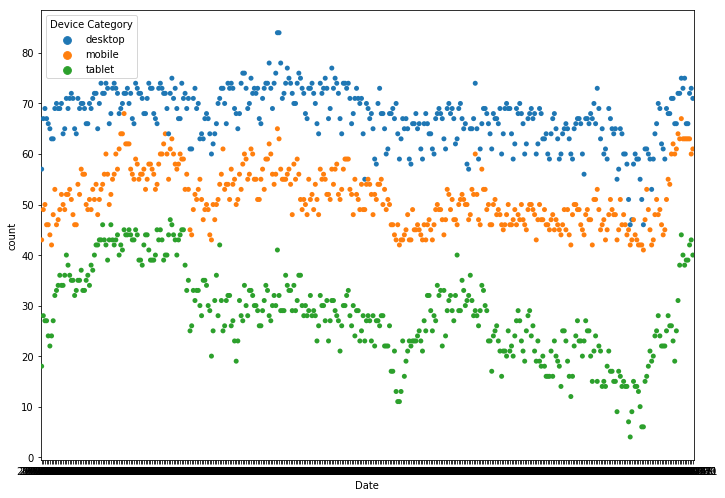

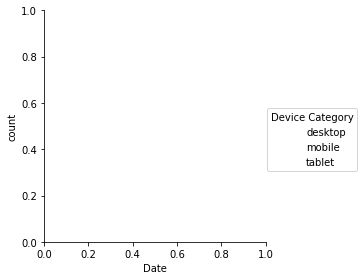

In [104]:
plotdf = df.groupby('Date')['Device Category'].value_counts().to_frame('count').reset_index()

dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
sns.factorplot(x = 'Date', y = 'count', hue = 'Device Category', data = plotdf, kind = 'strip', ax = ax)

Plotting historic developments in Channel

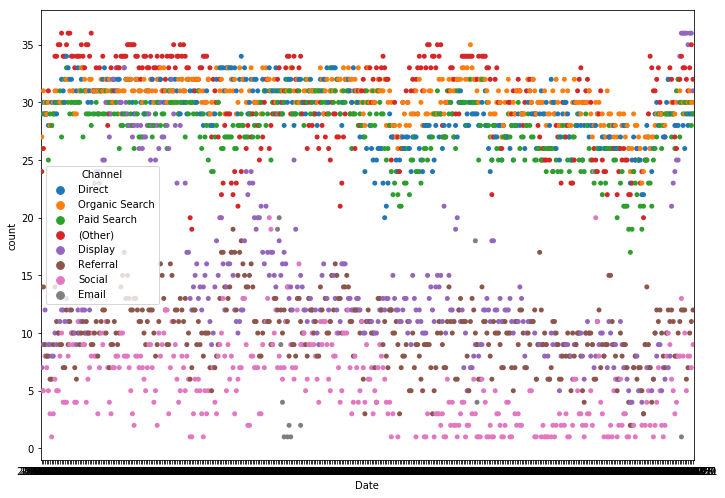

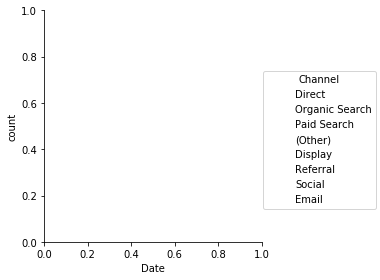

In [61]:
plotdf1 = df.groupby('Date')['Channel'].value_counts().to_frame('count').reset_index()

dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
sns.factorplot(x = 'Date', y = 'count', hue = 'Channel', data = plotdf1, kind = 'strip', ax = ax)

Historic development in age

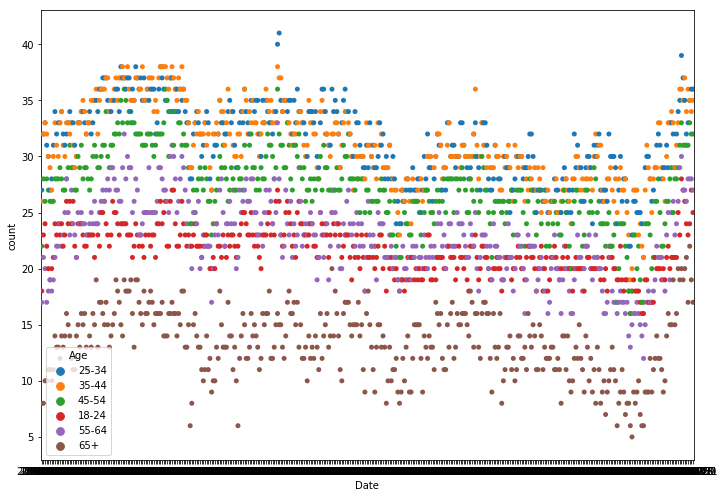

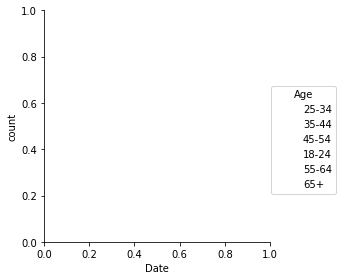

In [105]:
plotdf2 = df.groupby('Date')['Age'].value_counts().to_frame('count').reset_index()

dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
sns.factorplot(x = 'Date', y = 'count', hue = 'Age', data = plotdf2, kind = 'strip', ax = ax)

Historc development in gender

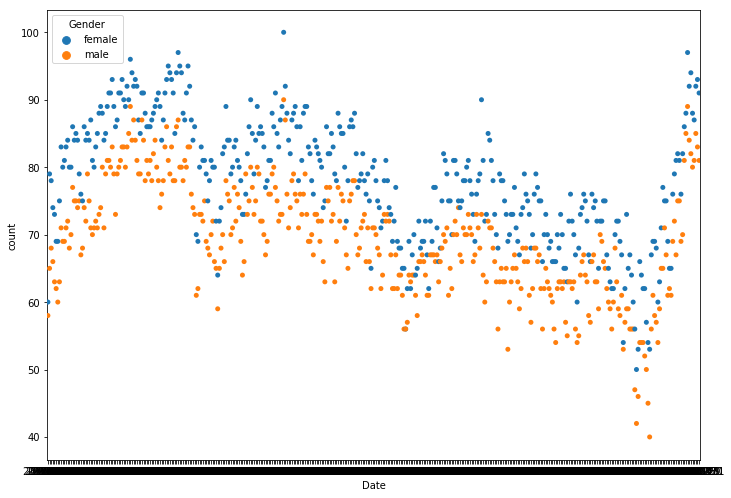

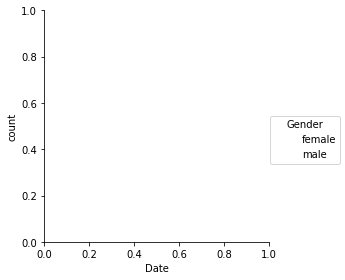

In [106]:
plotdf3 = df.groupby('Date')['Gender'].value_counts().to_frame('count').reset_index()

dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
sns.factorplot(x = 'Date', y = 'count', hue = 'Gender', data = plotdf3, kind = 'strip', ax = ax)

# In terms of the metrics, what are the customer groups to focus on

Most effecitve channel

In [96]:
df.groupby('Channel', as_index=True)['Conversion Rate','Bounce Rate', 'Pageview/session'].describe()

Conversion Rate                                               \
                         count      mean       std  min       25%       50%   
Channel                                                                       
(Other)                11926.0  0.025046  0.026678  0.0  0.000000  0.020833   
Direct                 11529.0  0.005274  0.012236  0.0  0.000000  0.000000   
Display                 5805.0  0.017870  0.026505  0.0  0.000000  0.001757   
Email                     82.0  0.123173  0.083666  0.0  0.062500  0.116516   
Organic Search         11993.0  0.018656  0.020362  0.0  0.000000  0.013853   
Paid Search            10976.0  0.035211  0.030788  0.0  0.010753  0.033058   
Referral                3970.0  0.017992  0.031082  0.0  0.000000  0.000000   
Social                  2014.0  0.027779  0.044430  0.0  0.000000  0.000000   

                                   Bounce Rate              ...                \
                     75%       max       count      mean    ...           75%   
Channel                                                     ...                 
(Other)         0.039216  0.272727     11926.0  0.699454    ...      0.793183   
Direct          0.005236  0.181818     11529.0  0.122721    ...      0.160401   
Display         0.028302  0.222222      5805.0  0.551557    ...      0.769231   
Email           0.171185  0.333333        82.0  0.489211    ...      0.600000   
Organic Search  0.026316  0.222222     11993.0  0.275434    ...      0.348485   
Paid Search     0.050891  0.307692     10976.0  0.687730    ...      0.746032   
Referral        0.026316  0.343750      3970.0  0.277484    ...      0.363636   
Social          0.050000  0.434783      2014.0  0.440183    ...      0.562500   

                         Pageview/session                                 \
                     max            count       mean       std       min   
Channel                                                                    
(Other)         1.000000          11926.0   2.993331  2.889242  0.909091   
Direct          0.833333          11529.0  16.301601  6.181772  1.166667   
Display         1.000000           5805.0   9.930518  8.587228  0.928571   
Email           0.800000             82.0   2.148591  0.923779  1.150000   
Organic Search  0.857143          11993.0  11.819871  5.863197  1.181818   
Paid Search     1.000000          10976.0   2.341727  1.550597  0.916667   
Referral        0.913043           3970.0  12.665579  7.073160  1.000000   
Social          1.000000           2014.0   6.453296  6.126992  1.000000   

                                                            
                      25%        50%        75%        max  
Channel                                                     
(Other)          1.228070   1.706919   3.526301  26.068182  
Direct          11.454545  15.526316  21.495091  49.347826  
Display          1.956522   7.812500  15.963855  58.727273  
Email            1.670139   1.901613   2.160229   6.100000  
Organic Search   7.194805  10.621622  16.352941  43.606061  
Paid Search      1.400000   1.787979   2.716954  24.913043  
Referral         6.783385  12.435417  17.459578  77.962963  
Social           2.214286   3.833333   8.800000  38.600000  

[8 rows x 24 columns]

Most effective device

In [97]:
df.groupby('Device Category', as_index=True)['Conversion Rate','Bounce Rate', 'Pageview/session'].describe()

Conversion Rate                                          \
                          count      mean       std  min  25%       50%   
Device Category                                                           
desktop                 26710.0  0.022559  0.026664  0.0  0.0  0.014409   
mobile                  20333.0  0.019763  0.025044  0.0  0.0  0.013245   
tablet                  11252.0  0.018356  0.033326  0.0  0.0  0.000000   

                                    Bounce Rate              ...      \
                      75%       max       count      mean    ...       
Device Category                                              ...       
desktop          0.035714  0.333333     26710.0  0.387898    ...       
mobile           0.030612  0.434783     20333.0  0.497216    ...       
tablet           0.029412  0.307692     11252.0  0.477048    ...       

                               Pageview/session                       \
                      75%  max            count       mean       std   
Device Category                                                        
desktop          0.636364  1.0          26710.0  11.798924  8.535895   
mobile           0.728814  1.0          20333.0   5.420076  4.521612   
tablet           0.750000  1.0          11252.0   7.718147  6.883036   

                                                                      
                      min       25%        50%        75%        max  
Device Category                                                       
desktop          0.928571  3.363345  11.136603  19.235586  77.962963  
mobile           0.937500  1.543860   3.384615   8.951673  46.428571  
tablet           0.909091  1.461538   5.390097  12.941597  43.606061  

[3 rows x 24 columns]

Age

In [99]:
df.groupby('Age')['Conversion Rate','Bounce Rate', 'Pageview/session'].describe()

Conversion Rate                                                    \
                count      mean       std  min  25%       50%       75%   
Age                                                                       
18-24          8579.0  0.020579  0.025591  0.0  0.0  0.012821  0.031746   
25-34         12353.0  0.025121  0.029130  0.0  0.0  0.017544  0.039548   
35-44         12293.0  0.023564  0.028846  0.0  0.0  0.015464  0.036517   
45-54         10808.0  0.019501  0.026347  0.0  0.0  0.010488  0.030534   
55-64          8966.0  0.016683  0.025488  0.0  0.0  0.000000  0.026316   
65+            5296.0  0.013979  0.027532  0.0  0.0  0.000000  0.018519   

                Bounce Rate              ...                     \
            max       count      mean    ...           75%  max   
Age                                      ...                      
18-24  0.333333      8579.0  0.458613    ...      0.715868  1.0   
25-34  0.434783     12353.0  0.393124    ...      0.636564  1.0   
35-44  0.343750     12293.0  0.399307    ...      0.636364  1.0   
45-54  0.318182     10808.0  0.437751    ...      0.685714  1.0   
55-64  0.285714      8966.0  0.504846    ...      0.750000  1.0   
65+    0.266667      5296.0  0.544063    ...      0.800000  1.0   

      Pageview/session                                                    \
                 count      mean       std       min       25%       50%   
Age                                                                        
18-24           8579.0  8.912004  7.857418  0.916667  1.792655  6.360825   
25-34          12353.0  9.468047  7.365488  0.916667  2.652893  7.923077   
35-44          12293.0  9.464081  7.443460  0.909091  2.636364  7.769231   
45-54          10808.0  8.845033  7.507177  0.916667  1.954371  6.834475   
55-64           8966.0  7.404149  7.242294  0.941176  1.404382  4.282642   
65+             5296.0  7.639871  8.524423  0.944444  1.190476  2.363636   

                             
             75%        max  
Age                          
18-24  14.336570  41.481481  
25-34  14.569231  46.428571  
35-44  14.607143  44.761905  
45-54  13.851957  58.727273  
55-64  11.801648  77.962963  
65+    13.858553  49.347826  

[6 rows x 24 columns]

Gender

In [107]:
df.groupby('Gender')['Conversion Rate','Bounce Rate', 'Pageview/session'].describe()

Conversion Rate                                                    \
                 count      mean       std  min  25%       50%       75%   
Gender                                                                     
female         30880.0  0.021408  0.027897  0.0  0.0  0.011765  0.034014   
male           27415.0  0.020057  0.027246  0.0  0.0  0.010638  0.031915   

                 Bounce Rate              ...                     \
             max       count      mean    ...           75%  max   
Gender                                    ...                      
female  0.333333     30880.0  0.428565    ...      0.681818  1.0   
male    0.434783     27415.0  0.459760    ...      0.705128  1.0   

       Pageview/session                                                    \
                  count      mean       std       min       25%       50%   
Gender                                                                      
female          30880.0  9.421353  7.988893  0.909091  2.066667  7.333333   
male            27415.0  8.071089  7.103194  0.909091  1.727273  5.700000   

                              
              75%        max  
Gender                        
female  15.000000  77.962963  
male    12.913173  46.096154  

[2 rows x 24 columns]

# Linear Regression to determine variable importance in creating a lead

In [144]:
from sklearn.linear_model import LinearRegression

Y = df[' Leads']
x = df[['Channel', 'Device Category', 'Age', 'Gender', 'Date']]

x_dummy = pd.get_dummies(x)

In [145]:
lr = LinearRegression()
model = lr.fit(x_dummy, Y)

In [146]:
pd.Series(model.coef_, index = x_dummy.columns)

Date                       0.000067
Channel_(Other)            2.192900
Channel_Direct            -0.502664
Channel_Display           -1.462472
Channel_Email              0.756524
Channel_Organic Search     3.966557
Channel_Paid Search        2.686305
Channel_Referral          -3.520508
Channel_Social            -4.116642
Device Category_desktop    2.410459
Device Category_mobile     0.800717
Device Category_tablet    -3.211176
Age_18-24                 -0.672876
Age_25-34                  4.377648
Age_35-44                  2.212799
Age_45-54                 -0.514373
Age_55-64                 -2.105510
Age_65+                   -3.297688
Gender_female              0.882428
Gender_male               -0.882428
dtype: float64

In [149]:
# model 2
y_2 = df[' Leads']
x_2 = df[['Channel', 'Device Category', 'Age', 'Gender', 'Date','unique']]

x2_d = pd.get_dummies(x_2)

In [151]:
model2 = lr.fit(x2_d, y_2)

In [156]:
pd.Series(model2.coef_, index=x2_d.columns).sort_values(ascending=False)

unique_Organic Searchdesktop25-34female    17.020119
unique_Organic Searchmobile25-34female     14.533369
unique_Paid Searchdesktop25-34female       10.831501
unique_Paid Searchmobile25-34female         8.077074
unique_Organic Searchdesktop25-34male       8.007025
unique_(Other)mobile25-34female             6.867760
unique_(Other)mobile35-44female             5.979810
unique_Organic Searchmobile35-44female      5.428247
unique_Organic Searchdesktop35-44female     5.356917
unique_Paid Searchmobile35-44female         4.805286
unique_Organic Searchdesktop18-24female     4.409091
unique_Organic Searchdesktop35-44male       4.293317
unique_Displaytablet65+male                 4.043886
unique_Socialtablet55-64male                3.942170
unique_Paid Searchdesktop18-24female        3.869463
unique_Paid Searchdesktop25-34male          3.795679
unique_(Other)desktop25-34female            3.720671
unique_Directtablet65+male                  3.670954
unique_Paid Searchdesktop35-44female        3.